In [2]:
##  This is my first attempt of lesson 3
    ##
    ##  Installing packages that we need
    using LinearAlgebra, Statistics, Plots

In [3]:
##  We will hopefully go through:
    ##  common data types, 
    ##  iteration,
    ##  more user defined functions,
    ##  comparisons and logic

In [3]:
##  Primitive data types
    ##
    x = true

    typeof(x)

    y = 1 > 2   ##  Now show false

##  The two most common data types used to represent numbers are intergers and flots
    ##
    typeof(1.0)

    typeof(1)


Int64

In [15]:
##  Arithmetic operators
    ##
    x = 2;
    y = 1.0;

    x * y

    x^2

    y/x

    2x - 3y

    @show 2x - 3y
    @show x + y;


2x - 3y = 1.0
x + y = 3.0


3.0

In [18]:
##  Complex numbers are another primitive data type, with the imaginery part being specified by im
    ##
    x = 1 + 2im

    y = 1 - 2im

    x * y   #   complex multiplication

5 + 0im

In [4]:
##  Strings are another type of primitive data
    ##
    x = "foobar"

    typeof(x)

    ##  Julia's string formatting operations
        ##
        x = 10;
        y = 20;

        "x = $x"
    
    ##  With parantheses you can splic the results of expresisions into strings as well
        ##
        "x + y = $(x + y)"

    ##  To concatenate strings use *
        ##
        "foo" * "bar"

    ##  Functions to work with strings
        ##
        s = "Charlie don't surf"

        split(s)

        replace(s, "surf" => "ski")

        split("fee, fi, fo", ",")

        strip(" foobar ")

        ##  find and replace  
            ##
            match(r"(\d+)", "Top 10")   #   Find digits in string

RegexMatch("10", 1="10")

In [40]:
##  Containers
    ##
    ##  Several basic types of structuress for storing data
        ##
        ##  Arrays
            ##
            x = ("foo", "bar")
            y = ("foo", 2)

            typeof(x)
            typeof(y)

            function f()
                return "foo", 1
            end
            f()
    
    ##  Tuples can also be unpacked directly into variables
        ##
        x = ("foo", 1)

        word, val = x
        
        println("word =$word, val = $val")

    ##  Tuples can be created with a hanging, this is useful to create a tuple with one element
        ##
        x = ("foo", 1)
        y = ("foo",)
        typeof(x), typeof(y)


word =foo, val = 1


(Tuple{String, Int64}, Tuple{String})

"obar"

In [50]:
##  Referencing items
    ##
    x = [10, 20, 30, 40]

    x[end]

    x[end - 1]

    x[1:3]

    x[2:end]

    str = "foobar"

    str[3:end]

"obar"

In [54]:
##  Dictionaries
    ##
    ##  Dictionaries are like arrays except that the items are named instead of numbered
        ##
        d = Dict("name" => "Frodo", "age" => 33)

    d["age"]

    ##  the strings 'name' and 'age' are called keys

    ##  They can be accessed via keys(d) and values(d)
        ##
        keys(d)
        values(d)


ValueIterator for a Dict{String, Any} with 2 entries. Values:
  "Frodo"
  33

In [64]:
##  Iterating
    ##
    ##  An iterable is something that you can put on the right hand side of for and loop over
        ##
        actions = ["surf", "ski"]
        for action in actions
            println("Charlie doesn't $action")
        end

    ##  If you ask for the keys of dictionary you get an iterator
        ##
        d = Dict("name" => "Frodo", "age" => 33)

        keys(d)

    ##  Transform an terator into an array
        ##
        collect(keys(d))

    ##  Looping without indicies
        ##
        x_values = 1:5

        for x in x_values
            println(x*x)
        end

    ##  Functional-style helper functions
        ##
        ##  zip() is used for stepping through pairs from two sequences
            ##
            countries = ("Japan", "Korea", "China")
            cities = ("Tokyo", "Seoul", "Bejing")
            for (country, city) in zip(countries, cities)
                println("The capital of $country is $city")
            end

        ##  If you need an index as well as the value
            ##
            countries = ("Japan", "Korea", "China")
            cities = ("Tokyo", "Seoul", "Bejing")
            for (i, country) in enumerate(countries)
                city = cities[i]
                println("The capital of $country is $city")
            end

Charlie doesn't surf
Charlie doesn't ski
1
4
9
16
25
The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Bejing
The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Bejing


In [3]:
##  Comprehensions
    ##
    ##  A tool for creating new arrays, dictionaries, etc. from iterables
        ##
        doubles = [2i for i in 1:4]

        animals = ["dog", "cat", "dog"];

        plurals = [animal * "s" for animal in animals]

        [i + j for i in 1:3, j in 4:6]

        [i + j + k for i in 1:3, j in 4:6, k in 7:9]

        [(i,j) for i in 1:2, j in animals]
        

        

2×3 Matrix{Tuple{Int64, String}}:
 (1, "dog")  (1, "cat")  (1, "dog")
 (2, "dog")  (2, "cat")  (2, "dog")

In [7]:
##  Generators
    ##
    ##  There are cases where you wish to use a comprehension to create an iterable list rather than making it a concreate array.
        ##
        ##  The benefit og this is that you can use functions which take general iterators rather than arrys without allocating and storing any temporary values.
            ##
            ##  Generate a temporary array of size 10,000 and find the sum
                ##
                xs = 1:100000
                f(x) = x^2
                f_x= f.(xs)
                sum(f_x)

                ##  We could have created the temporary using a comprehension
                    ##
                    f_x2 = [f(x) for x in xs]
                    @show sum(f_x2)
                    @show sum([f(x) for x in xs]);  ##  Still allocatesd temporary
                    
                    sum(f(x) for x in xs)

            ##  Compare teh speed of these three measures
                ##
                using BenchmarkTools
                @btime sum([f(x) for x in $xs])
                @btime sum(f.($xs))
                @btime sum(f(x) for x in $xs);

sum(f_x2) = 333338333350000
sum([f(x) for x = xs]) = 333338333350000


  54.300 μs (2 allocations: 781.30 KiB)


  63.100 μs (2 allocations: 781.30 KiB)


  2.400 ns (0 allocations: 0 bytes)


In [11]:
##  Comparisons and logical operators
    ##
    x =1
    x == 2

    x != 3

    x + 1E-8 ≈ 1

true

In [13]:
##  Combining expressions
    ##
    true && false

    true || false

    

true

In [29]:
##  User defined functions
    ##
    function f1(a,b)
        return a * b
    end
    
    function f2(a, b)
        a * b
    end
    
    function foo(x)
        if x > 0
            return positive
        end
        return "nonpositive"
    end

    f(x) = sin( 1/ x)

    f(1/pi)

    map(x -> sin(1/x), randn(3)) #  Apply the function to each element

    ##  Option and keyword arguments
        ##
        ##  Function arguemetns can be given default values
            ##
            f(x, a = 1) = exp(cos(a*x))

            f(pi)

            f(pi, 2)

        ##  Another option is keyword arguments
            ##
            f(x; a = 1) = exp(cos(a * x)) # note the ; in the definition

            f(pi; a = 2)    ##  The ; in this case for calling the function is optional and the last line could equivalently be f(pi, a = 2).

            ##  For example
                ##
                a = 2
                f(pi; a) #  equivalent to f(pi, a=a)
        ##  The automatic naming of keyword arguements is also picked up automaticall when they are fields in named tuples or structs
            ##
            nt = (; a= 2, b = 10)
            f(pi; nt.a)

2.718281828459045

In [47]:
##  Broadcasting
    ##
    ##  A common scenario in computinf is that we have a function and we wish to apply it to every element of an iterable x_vec
        ##
        ##  Suppose that we want to apply sin to x_vec = [2.0, 4.0, 6.0, 8.0]
            ##
            x_vec = [2.0, 4.0, 6.0, 8.0]
            y_vec = similar(x_vec)

            for (i,x) in enumerate(x_vec)
                y_vec[i] = sin(x)
            end

        ##  Or alternativel iterating with indices
            ##
            x_vec = [2.0, 4.0, 6.0, 8.0]
            y_vec = similar(x_vec)
            for i in eachindex(x_vec)
                y_vec[i] = sin(x_vec[i])
            end

            ##  But this is a bit unwildy so Julia offers the alternative syntax:
                ##
                y_vec =sin.(x_vec)

        ##  If f is any Julia function then f. references the broadcasted version
            ##
            function chisq(k)
                @assert k > 0
                z = randn(k)
                return sum(z -> z^2, z) #   Same as 'sum(x^2 for x in z)'
            end

            chisq(3)

            #chisq(-2)

            ##  Can make this work on an array too
                ##
                chisq.([2, 4, 6])

            ##  The broadcasting notion is not simply vectorisation, as it is also able to 'fuse' multiple broadcasts together to genreate an efficient code
                ##
                x = 1.0:1.0:5.0
                y = [2.0, 4.0, 5.0, 6.0, 8.0]
                z = similar(y)
                z .= x .+ y .- sin.(x) # generates efficient code instead of many temporaries

            ##  A convenience macro for broadcasting is 
                ##
                @. z = x + y - sin(x)
            
            ##  The complier will fix anything which is scaler, and otherwise itterate across every vectorisation
                ##
                f(a, b) = a + b #   bivariate function
                a = [1 2 3]
                b = [4 5 6]
                @show f.(a, b)  #   across both
                @show f.(a, 2)  #   fix scaler for second

                ##  Another place that you may use a Ref is to fix a function parameter you do not want to braodcast over.
                    ##
                    f(x, y) = [1, 2, 3] ⋅ x + y #   "." can be typed by \cdot
                    f([3, 4, 5], 2)  #   uses a vector as first parameter
                    f.(Ref([3, 4, 5]), [2, 3])  #   broadcasting over 2nd parameter, fixing first

f.(a, b) = [5 7 9]
f.(a, 2) = [3 4 5]


2-element Vector{Int64}:
 28
 29

In [53]:
##  Scoping and closures
    ##
    ##  Since global variables are usually a bad idea, we will concentrate on understanding the role of good local scoping practice.
        ##
        ##  Functions
            ##
            ##  the scope of a variable name determines where it is valid to refer to it
            ##
            f(x) = x^2 # local 'x' in scope

            #   x is not bound to anything in this outer scope
            y = 5
            f(y)
            
        ##  This is equivallent if the y was changed to x, since its a different scope
            ##
            f(x) = x^2  #   local 'x' in scope

            #   x is not bound to anything in this outer scope
            x = 5   #   a different 'x' than the local name
            f(x)

        ##  The scoping also applies to named arguements in functions
            ##
            f(x; y =1) = x + y  #   'x' amd 'y' are names local to the 'f' functions
            xval = 0.1
            yval = 2
            f(xval; y = yval)

        ##  Due to scoping you could write this as
            ##
            f(x; y =1) = x + y
            x = 0.1
            y = 2
            f(x; y ) #  the type and value of y taken from scope

        ##  Similarly to named arguements, the local scope also works with named tuples.
            ##
            xval = 0.1
            yval = 2

            @show (; x = xval, y = yval)    #   named tuple with names 'x' and 'y'

            x = 0.1
            y = 2

            ##  create a named tuple with names 'x' and 'y' local to the tuple
            @show (; x = x, y = y)

            #   Better yet
            @show (;x,y);

            

(; x = xval, y = yval) = (x = 0.1, y = 2)
(; x = x, y = y) = (x = 0.1, y = 2)
(; x, y) = (x = 0.1, y = 2)


In [54]:
f(x) = x^2  #   Local 'x' in scope

x = 1:5 #    not an integer

f.(x) # Broadcasts the x^2 function over the vector

5-element Vector{Int64}:
  1
  4
  9
 16
 25

In [3]:
##  Closures
    ##
    f(x, a) = a * x^2
    f(1, 0.2)

    ##  While the above was convenient, there are other times when yu want to simply fix a variable or refer to something already calculated
        ##
        a = 0.2
        f(x) = a * x^2
        f(1)

        ##  Embedded in other functions
            ##
            function g(a)
                f(x) = a * x^2  #   referes to the 'a' passed in the function
                f(1)    #   univariate function

            end
            g(0.2)

        ##  THIS IS CALLED A CLOSURE
        
        ##  b
            ##
            function solve_model(x)
                a = x^2
                b = 2 * a
                c = a + b
                return (; a, b, c)  # note the lcal scope of tuples!
            end

            solve_model(0.1)

        #   named tuple and structure parameters can be unpacked using the reverse notation
        
        (; a,b,c) = solve_model(0.1)
        println("a = $a, b = $b, c = $c")

##  Higher order functions
    ##
    twice(f, x) = f(f(x))
    f(x) = x^2
    @show twice(f, 2.0)

    twice(x -> x^2, 2.0)
    a = 5
    g(x) = a*x
    @show twice(g, 2);  #   using a closure

    ##  a function that returns a closure itself
        ##
        function multiplyit(a, g)
            return x -> a * g(x)    #   Function with 'g' used in the closure
        end

        f(x) = x^2
        h = multiplyit(2.0, f)  #   returns a function that doubles the result
        h(2)

    

a = 0.010000000000000002, b = 0.020000000000000004, c = 0.030000000000000006
twice(f, 2.0) = 16.0
twice(g, 2) = 50


8.0

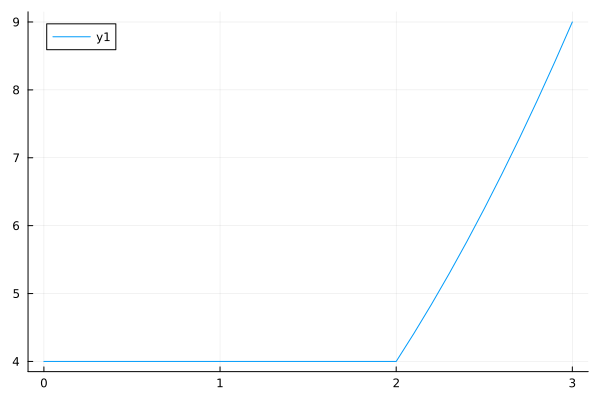

In [5]:
##  You can create and define using functions as well
    ##
    function snapabove(g, a)
        function f(x)
            if x > a    #   'a' is captured in the closure f
                return g(x)
            else
                return g(a)
            end
        end
        return f    #   closure with the embedded a
    end

    f(x) = x^2
    h = snapabove(f, 2.0)
    plot(h, 0.0:0.1:3.0)

##  The above can be written more succinctly using the ternary operation
    ##
    function snapabove2(g, a)
        return x -> x > a ? g(x) : g(a) #   returns a closure
    end
    plot(snapabove2(f, 2.0), 0.0:0.1:3.0)

In [11]:
##  Loops
    ##
    for i in 1:2    #   introduces local i
        dval1 = i
        println(i)
    end

    #   @show (i, dval1)    # would fail as neither exists in this scope

    for i in 1:2    #   introduces a different local i
        println(i)
    end

    ##  As with closures, if a variable is already dewfined it will be available in the inner scope
        ##
        dval2 = 0   #   introduces variables
        for i in 1:2    #   introduces local i
            dval2 = i   #   refers to the outer variable
        end

        dval2   #   still can't refer to 'i

    ##  Similar for while Loops
        ##
        val = 1.0
        tol = 0.002
        while val > tol
            old = val
            val = val/2
            difference = val - old
        end

        @show val;
        #   @show difference fails, not in scope


1
2
1
2
val = 0.001953125


0.001953125

In [14]:
##  A check for scoping design
    ##
    x = 2.0
    f(y) = x + y
    z = f(4.0)

    for i in 1:3
        z += i
    end

    println("z = $z")

    ##  You can simply wrap the entire code in a function
        ##
        function wrapped()
            x = 2.0
            f(y) = x + y
            z = f(4.0)

            for i in 1:3
                z += i
            end

            println("z = $z")
        end

        wrapped()

z = 12.0
z = 12.0


In [40]:
##  Exercise 1
    ##
    ##  Part 1: inner product of two vectors
        ##
        x_vals = [1, 2, 3]
        y_vals = [1, 1, 1]

        sum(x * y for (x, y) in zip(x_vals, y_vals))

    ##  Part 2: count the number of even numbers between 0 and 99 using a comprehension
        ##
        sum(iseven, 0:99)

    ##  Part 3: count the number of pairs such that both are even
        ##
        my_pairs = ((2,5), (4,2), (9,8), (12,10))

        sum(xy -> all(iseven, xy), my_pairs)

2

In [ ]:
##  Exercise 2
    ##
    p(x, coeff) = sum(a * x^(i -1 ) for (i, a) in enumerate(coeff))

    p(1, (2, 4))
